<a href="https://colab.research.google.com/github/dtabuena/CrispyMice/blob/main/Run_All_Crispy_Recs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter


'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib
to_import = [
            'ABF_Quality_Control.ipynb',
            'Basic_Ephys.ipynb',
            'Simple_ABF_tools.ipynb',
            'fun_math.ipynb',
            'importing_abfs_from_dropbox.ipynb',
            'QC_recoding_dataframe.ipynb',
            'Analyzers/input_resistance_analyzer.ipynb',
            'Analyzers/gain_analyzer.ipynb',
            'Analyzers/latencey_analyzer.ipynb',
            'Analyzers/IV_analyzer.ipynb',
            'Analyzers/Vm_analyzer.ipynb',
            'Analyzers/membrane_analyzer.ipynb',
            'Analyzers/rheobase_analyzer.ipynb',
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f


try: shutil.rmtree('/content/CrispyMice')
except: None
!git clone https://github.com/dtabuena/CrispyMice
to_import = ['CrispyPipelineFuncs.ipynb']
for i in to_import:
    f = '/content/CrispyMice/' + i
    %run $f


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'EphysLib'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 449 (delta 108), reused 54 (delta 54), pack-reused 307
Receiving objects: 100% (449/449), 240.52 KiB | 634.00 KiB/s, done.
Resolving deltas: 100% (282/282), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'CrispyMice'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 177 (delta 53), reused 25 (delta 25), pack-reused 107
Receiving objects: 100% (177/177), 8.19 MiB | 13.77 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [ ]:
##### Setup Protocol List
VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/251 [00:00<?, ?it/s]

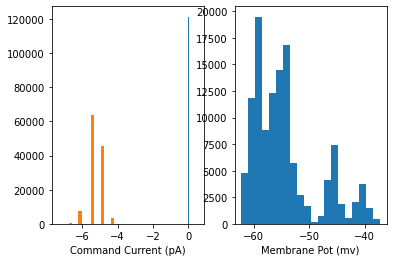

  0%|          | 1/251 [00:00<01:59,  2.10it/s]

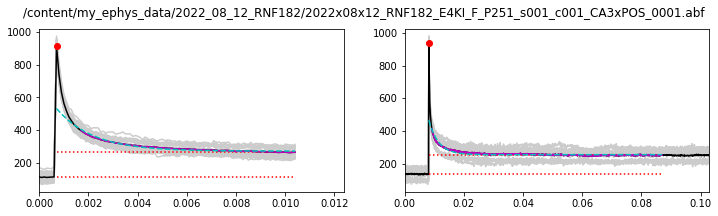

  2%|▏         | 4/251 [00:01<01:29,  2.75it/s]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0003.abf


  2%|▏         | 5/251 [00:03<03:13,  1.27it/s]

<Figure size 432x288 with 0 Axes>

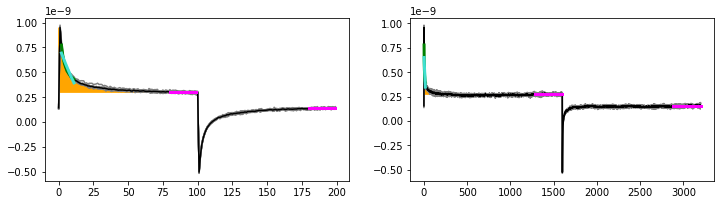

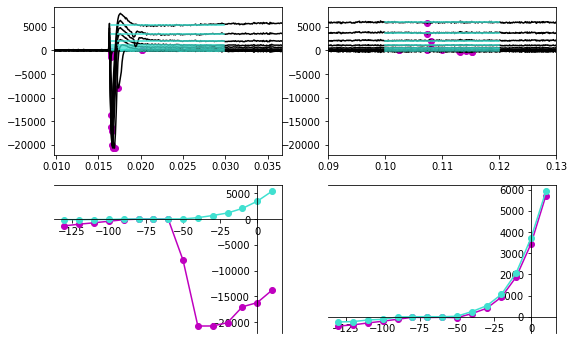

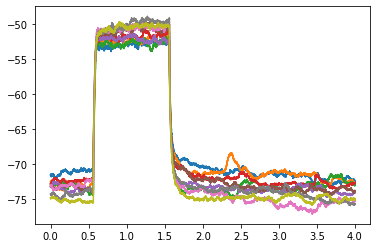

  2%|▏         | 6/251 [00:06<05:38,  1.38s/it]

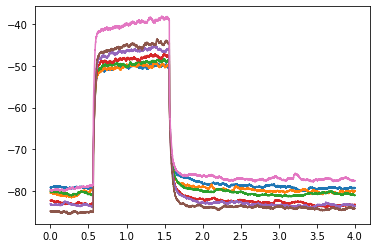

  3%|▎         | 7/251 [00:07<05:47,  1.42s/it]

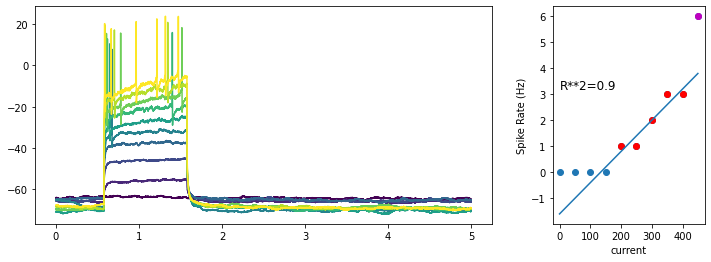

  3%|▎         | 8/251 [00:10<07:25,  1.83s/it]

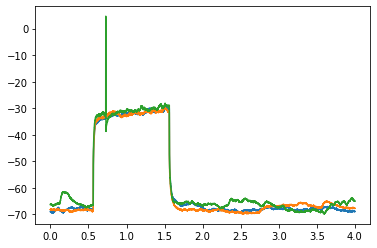

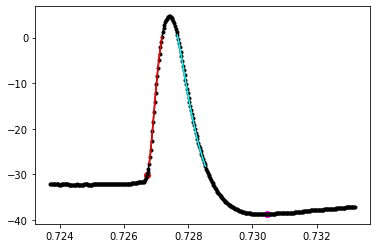

  4%|▍         | 10/251 [00:15<08:03,  2.00s/it]

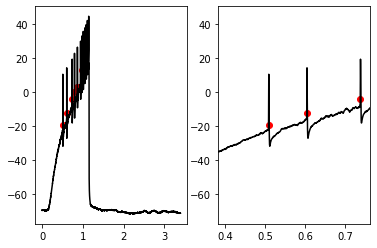

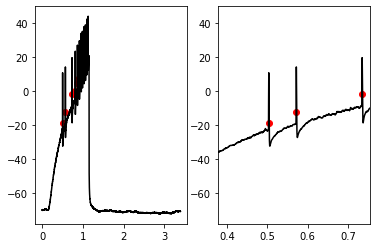

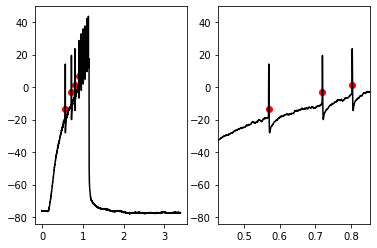

  4%|▍         | 11/251 [00:16<07:26,  1.86s/it]

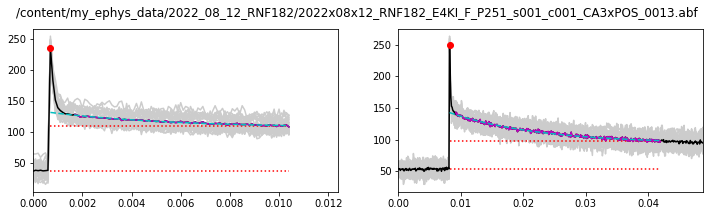

  6%|▌         | 14/251 [00:17<03:51,  1.03it/s]

<Figure size 432x288 with 0 Axes>

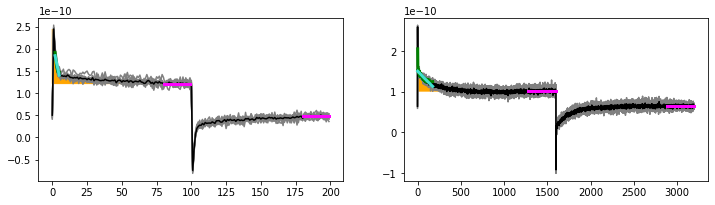

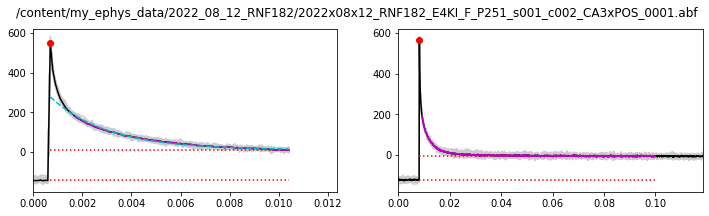

  6%|▋         | 16/251 [00:19<03:23,  1.15it/s]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c002_CA3xPOS_0002.abf


<Figure size 432x288 with 0 Axes>

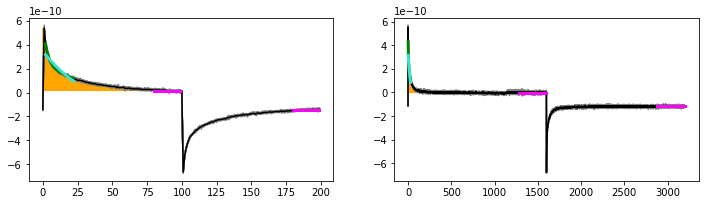

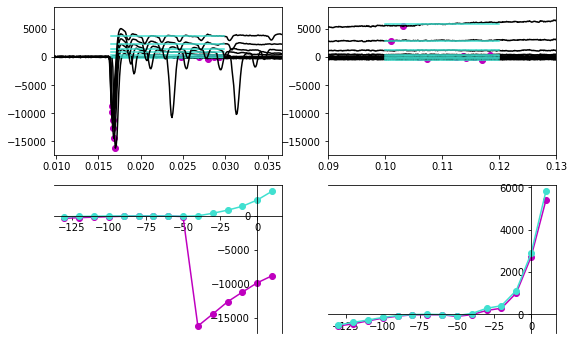

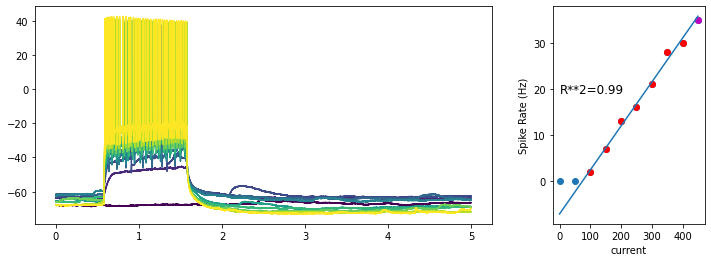

  7%|▋         | 18/251 [00:22<04:42,  1.21s/it]

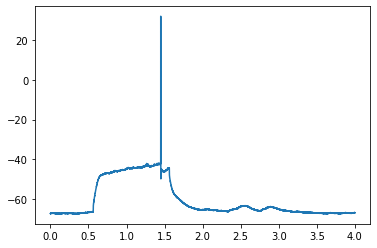

  8%|▊         | 19/251 [00:22<03:52,  1.00s/it]

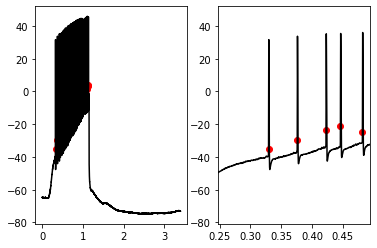

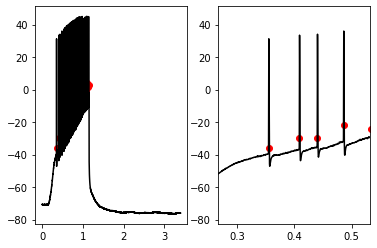

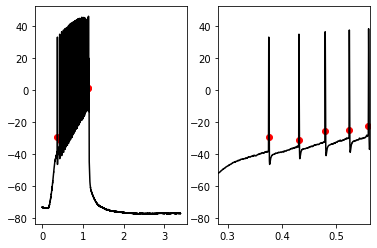

  8%|▊         | 21/251 [00:25<04:35,  1.20s/it]

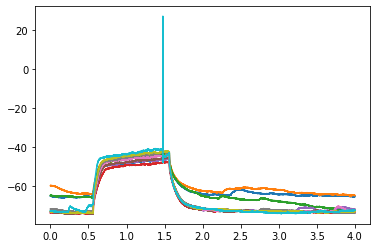

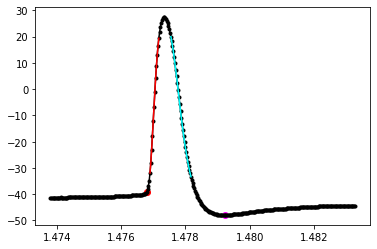

  9%|▉         | 22/251 [00:30<07:50,  2.06s/it]

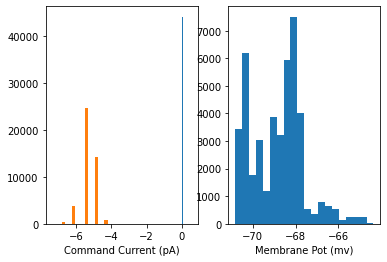

  9%|▉         | 23/251 [00:30<06:14,  1.64s/it]

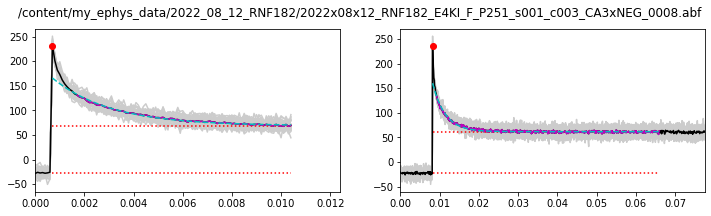

 10%|▉         | 24/251 [00:31<05:23,  1.42s/it]

<Figure size 432x288 with 0 Axes>

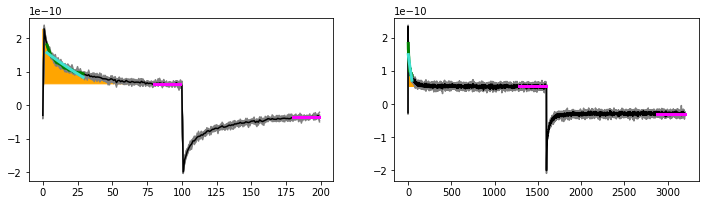

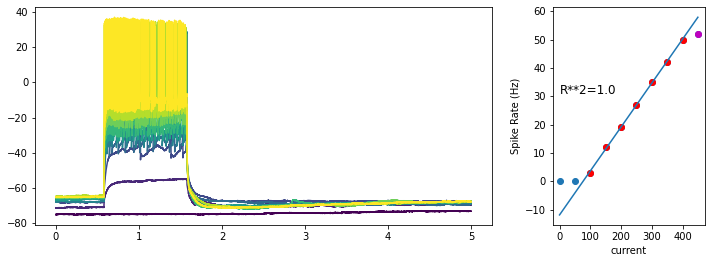

 10%|▉         | 25/251 [00:34<06:51,  1.82s/it]

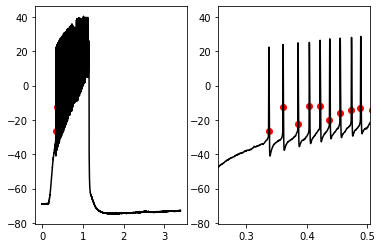

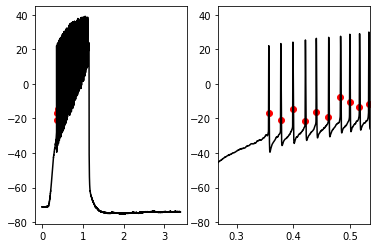

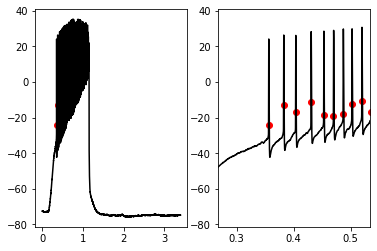

 10%|█         | 26/251 [00:36<06:33,  1.75s/it]

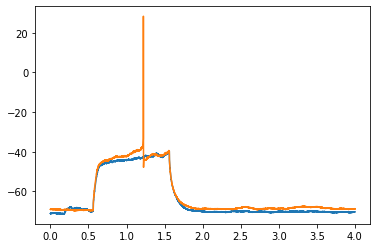

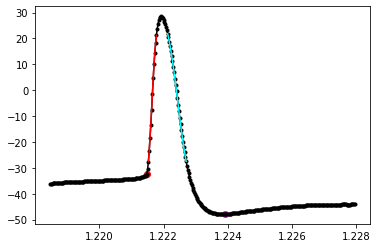

 12%|█▏        | 29/251 [00:40<05:11,  1.40s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c003_CA3xNEG_0013.abf


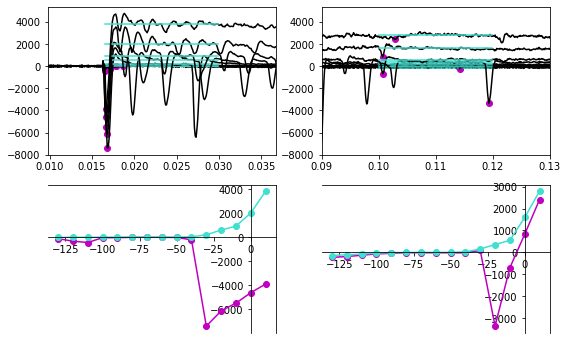

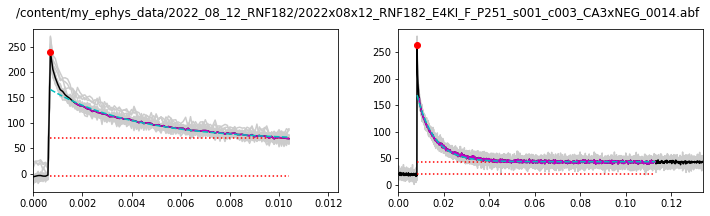

 12%|█▏        | 30/251 [00:42<05:11,  1.41s/it]

<Figure size 432x288 with 0 Axes>

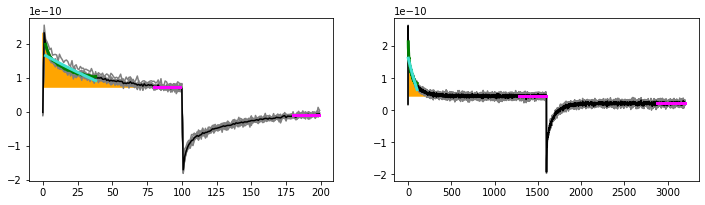

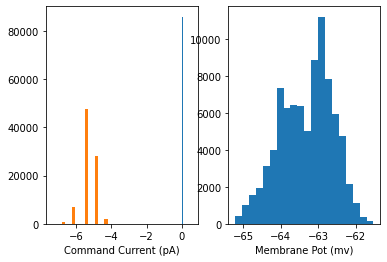

 13%|█▎        | 32/251 [00:42<03:22,  1.08it/s]

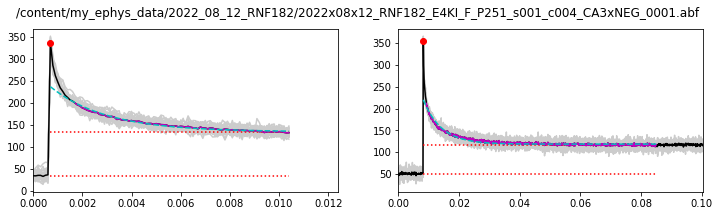

 13%|█▎        | 33/251 [00:43<03:24,  1.07it/s]

<Figure size 432x288 with 0 Axes>

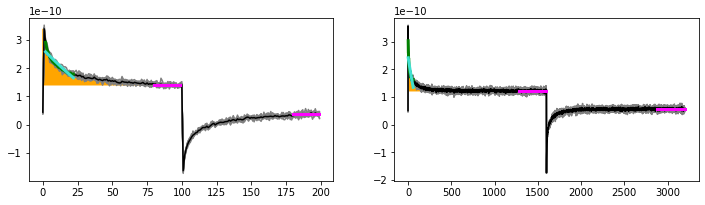

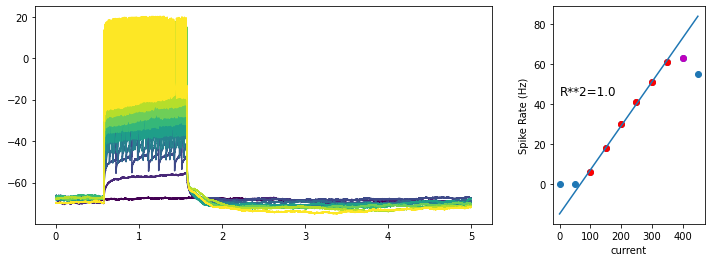

 14%|█▎        | 34/251 [00:46<05:10,  1.43s/it]

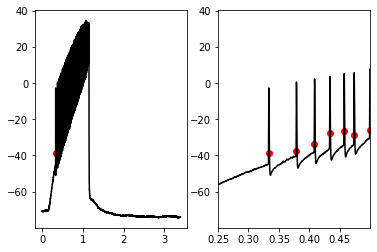

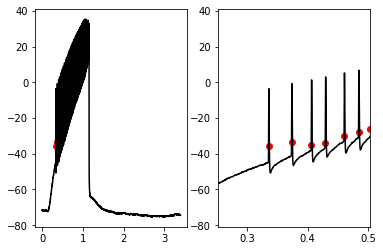

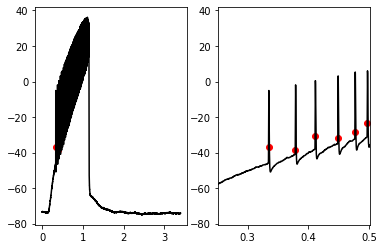

 14%|█▍        | 35/251 [00:48<05:17,  1.47s/it]

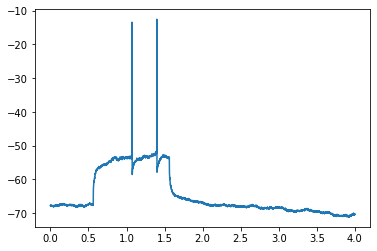

 14%|█▍        | 36/251 [00:48<04:04,  1.14s/it]

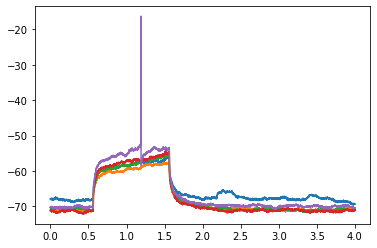

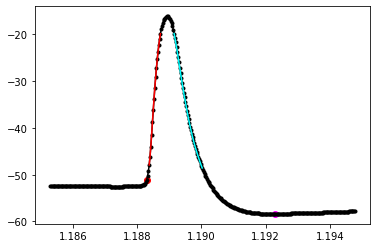

 16%|█▌        | 40/251 [00:53<03:31,  1.00s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c004_CA3xNEG_0008.abf


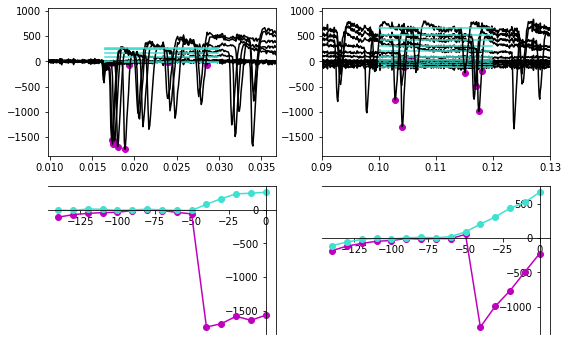

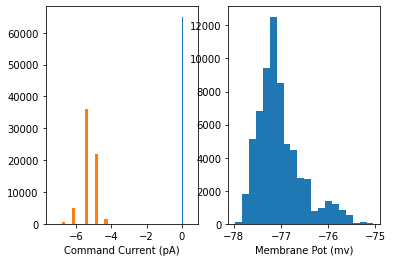

 16%|█▋        | 41/251 [00:54<03:30,  1.00s/it]

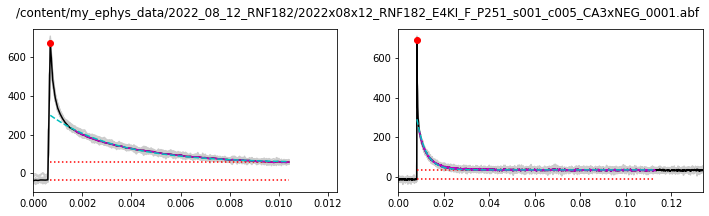

 17%|█▋        | 42/251 [00:55<03:24,  1.02it/s]

<Figure size 432x288 with 0 Axes>

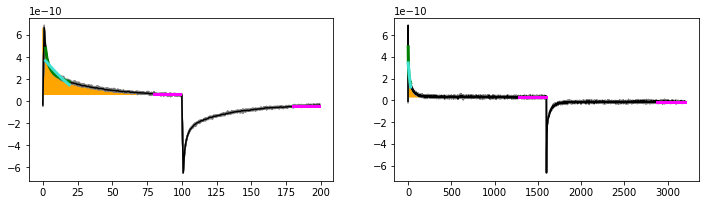

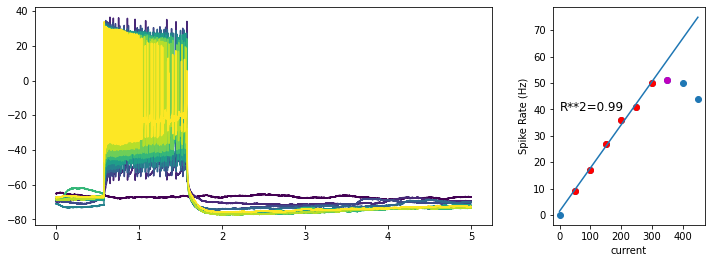

 17%|█▋        | 43/251 [00:58<05:06,  1.48s/it]

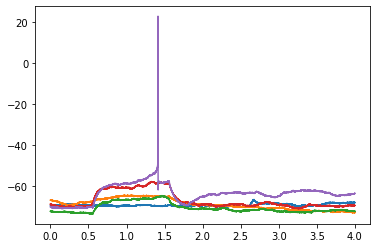

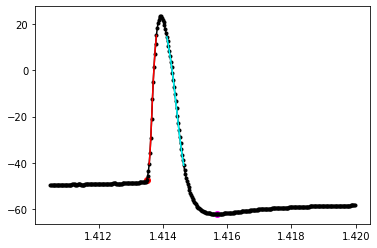

 18%|█▊        | 44/251 [01:02<07:11,  2.08s/it]

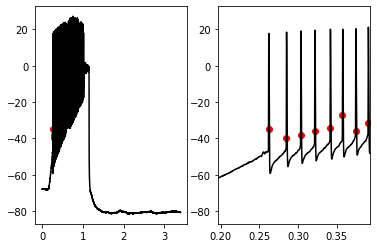

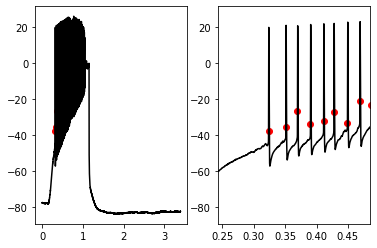

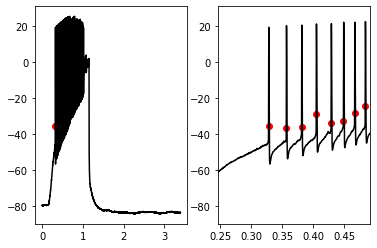

 18%|█▊        | 45/251 [01:03<06:41,  1.95s/it]

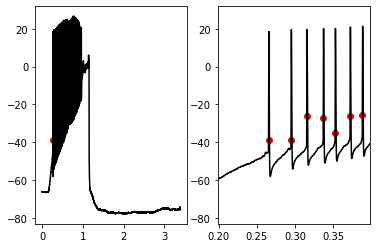

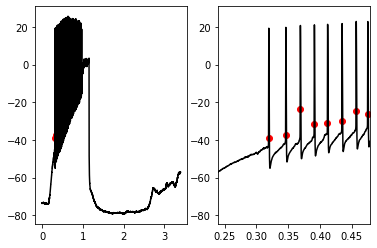

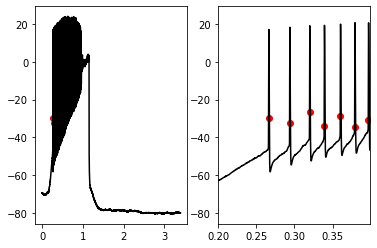

 19%|█▉        | 48/251 [01:07<04:41,  1.39s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s001_c005_CA3xNEG_0007.abf


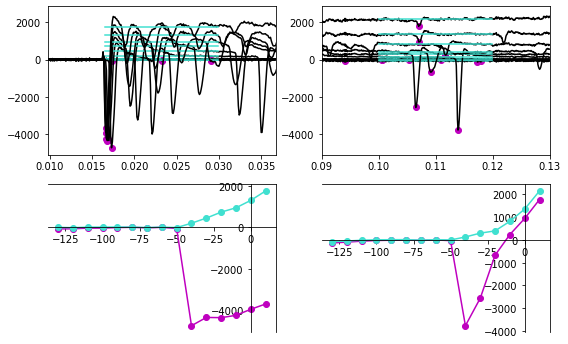

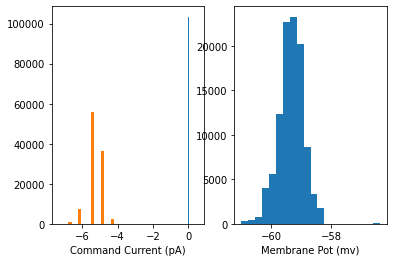

 21%|██        | 52/251 [01:08<02:16,  1.46it/s]

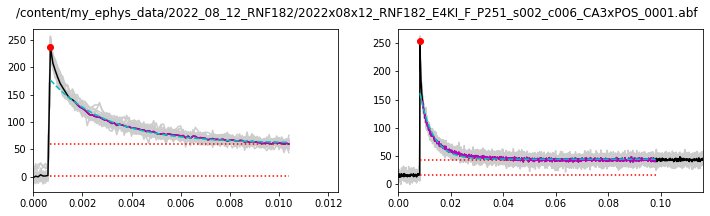

 21%|██        | 53/251 [01:09<02:23,  1.38it/s]

<Figure size 432x288 with 0 Axes>

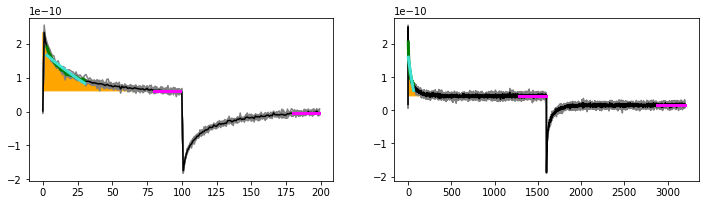

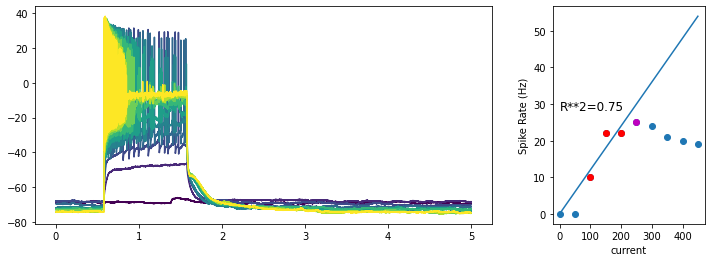

 22%|██▏       | 54/251 [01:12<03:46,  1.15s/it]

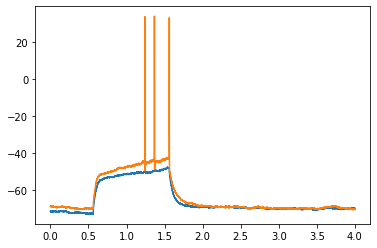

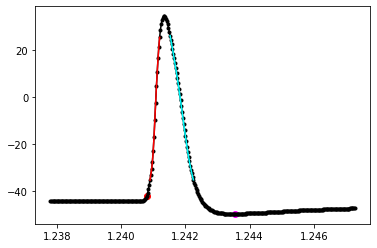

 22%|██▏       | 55/251 [01:15<05:08,  1.57s/it]

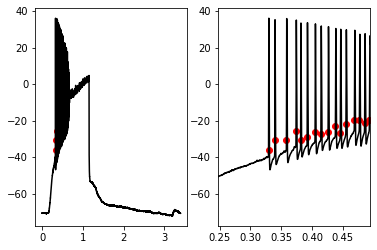

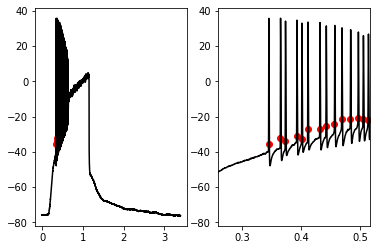

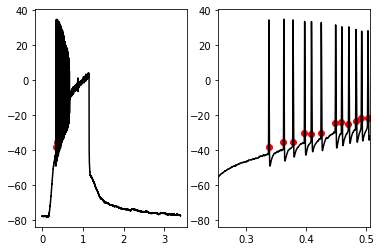

 23%|██▎       | 57/251 [01:18<05:02,  1.56s/it]

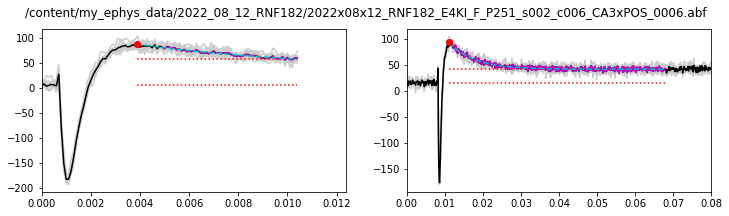

 23%|██▎       | 58/251 [01:19<04:02,  1.26s/it]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c006_CA3xPOS_0006.abf


 24%|██▎       | 59/251 [01:19<03:07,  1.03it/s]

error on:  my_ephys_data/2022_08_12_RNF182/2022x08x12_RNF182_E4KI_F_P251_s002_c006_CA3xPOS_0007.abf


<Figure size 432x288 with 0 Axes>

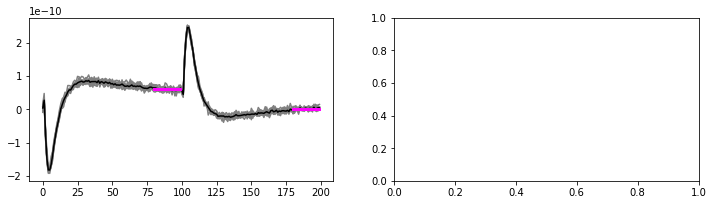

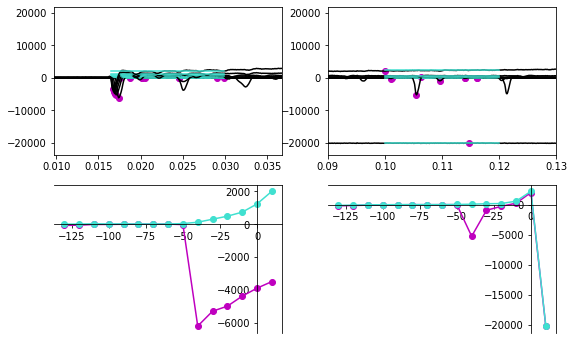

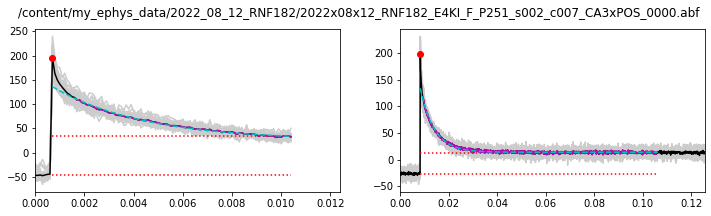

 24%|██▍       | 61/251 [01:20<02:54,  1.09it/s]

<Figure size 432x288 with 0 Axes>

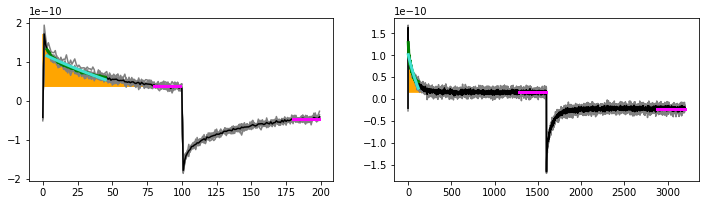

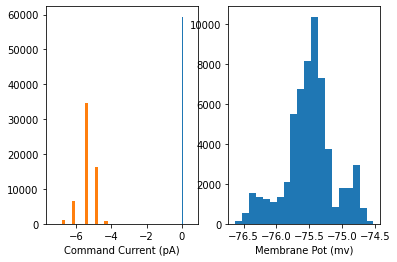

 25%|██▍       | 62/251 [01:21<02:49,  1.12it/s]

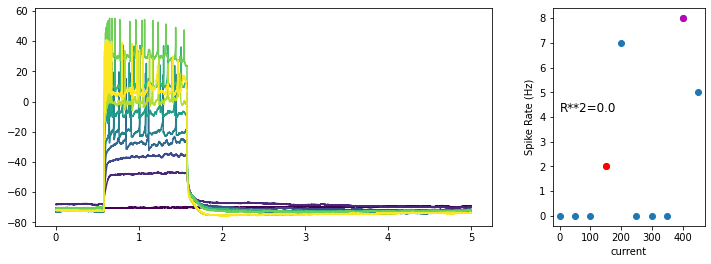

 25%|██▌       | 63/251 [01:24<04:09,  1.33s/it]

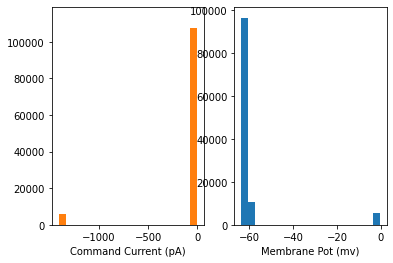

 25%|██▌       | 64/251 [01:24<03:24,  1.10s/it]

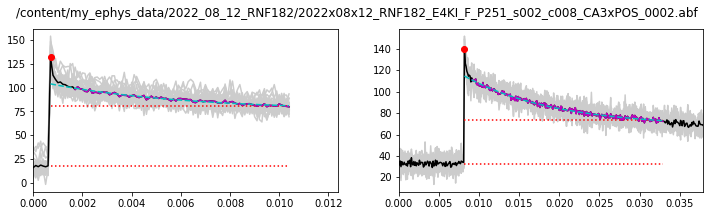

 26%|██▋       | 66/251 [01:27<03:59,  1.29s/it]

<Figure size 432x288 with 0 Axes>

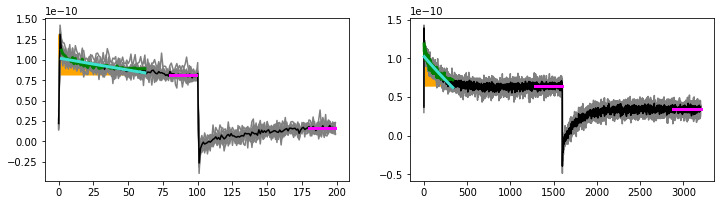

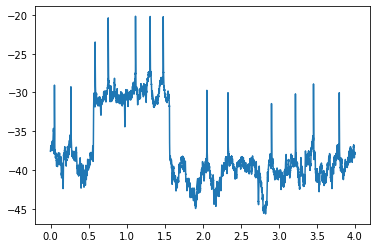

 27%|██▋       | 67/251 [01:28<03:19,  1.08s/it]

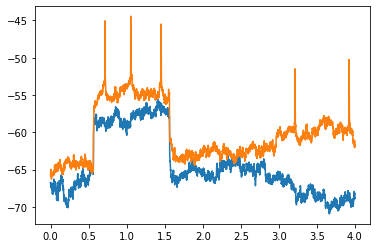

 27%|██▋       | 68/251 [01:28<02:55,  1.04it/s]

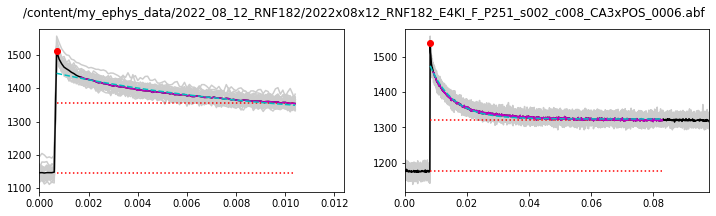

 27%|██▋       | 69/251 [01:29<02:56,  1.03it/s]

<Figure size 432x288 with 0 Axes>

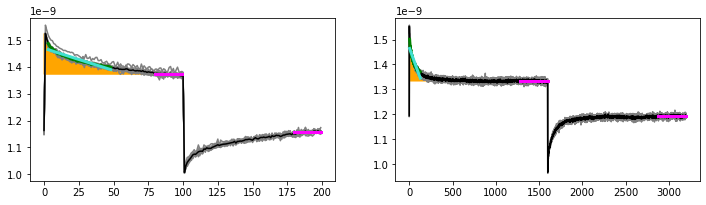

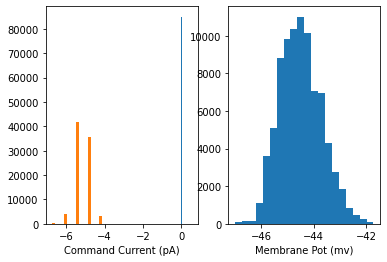

 28%|██▊       | 70/251 [01:30<02:42,  1.12it/s]

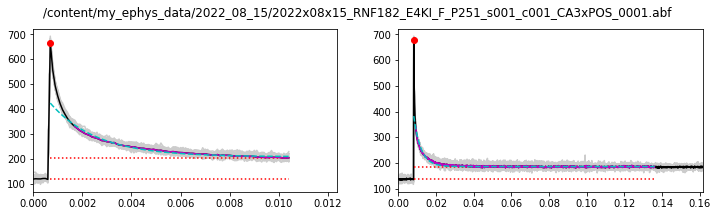

 29%|██▊       | 72/251 [01:31<02:06,  1.42it/s]

error on:  my_ephys_data/2022_08_15/2022x08x15_RNF182_E4KI_F_P251_s001_c001_CA3xPOS_0002.abf


<Figure size 432x288 with 0 Axes>

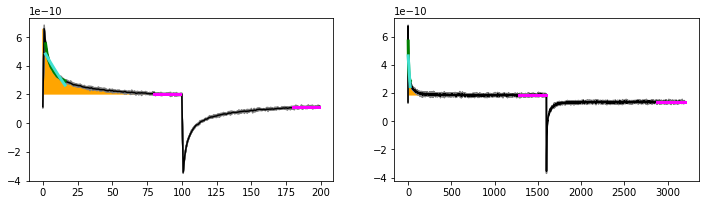

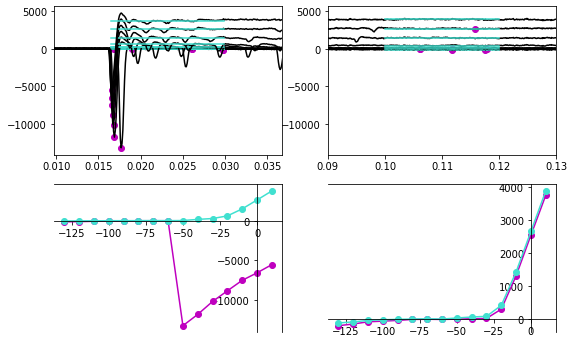

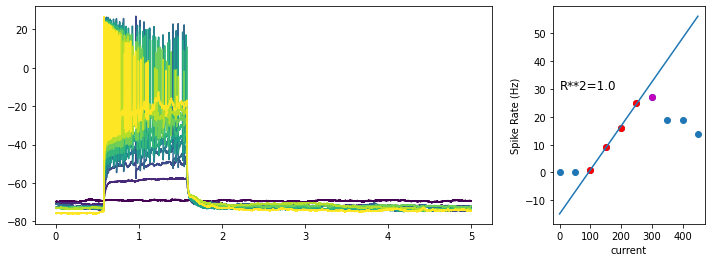

 29%|██▉       | 73/251 [01:35<04:24,  1.49s/it]

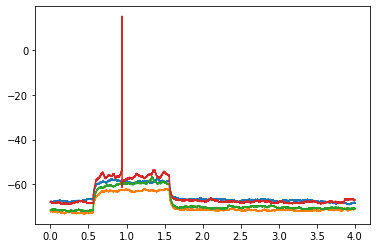

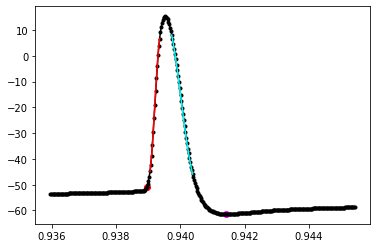

 30%|███       | 76/251 [01:39<04:12,  1.44s/it]

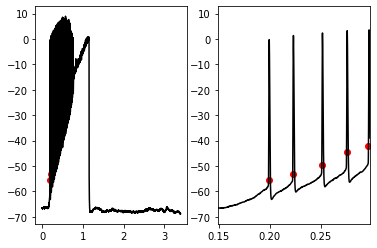

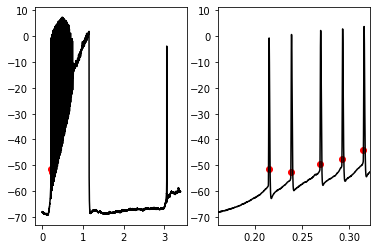

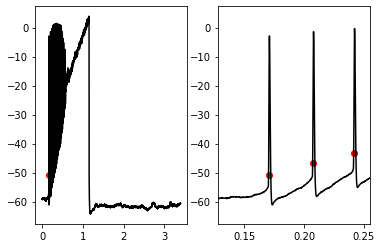

 31%|███       | 77/251 [01:41<04:18,  1.48s/it]

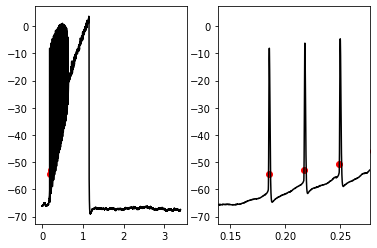

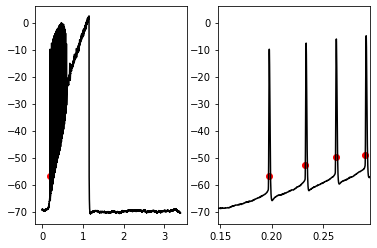

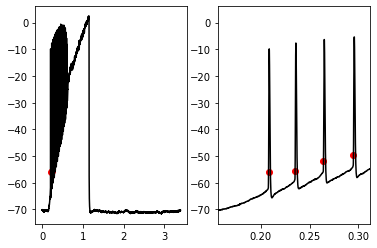

 31%|███       | 78/251 [01:43<04:22,  1.52s/it]

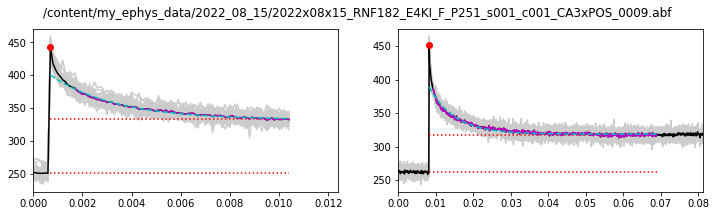

 31%|███▏      | 79/251 [01:44<03:57,  1.38s/it]

<Figure size 432x288 with 0 Axes>

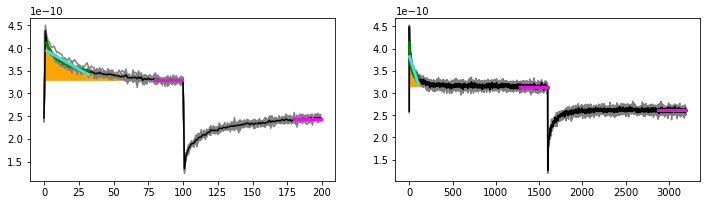

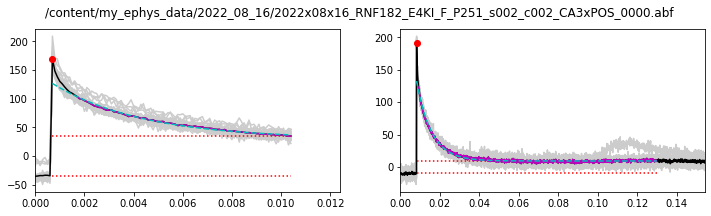

 32%|███▏      | 80/251 [01:45<03:46,  1.33s/it]

<Figure size 432x288 with 0 Axes>

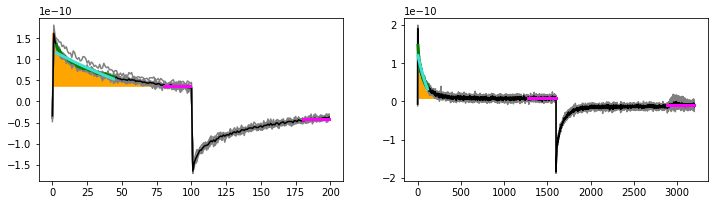

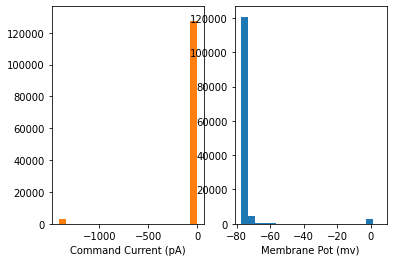

 33%|███▎      | 82/251 [01:46<02:31,  1.11it/s]

error on:  my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P251_s002_c002_CA3xPOS_0003.abf


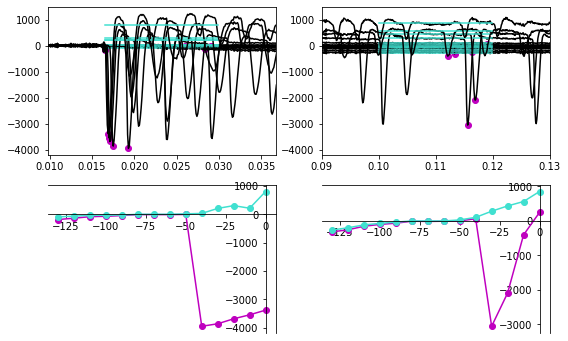

In [ ]:
dataset = {'data_name': 'RNF182',
           'data_source': "https://www.dropbox.com/sh/n9t8p257wnzlijk/AAC9Z36JodisyZjnM3mkJC3Xa?dl=0",
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

RNF182_results = crispy_mouse_wrap(dataset,VC_prot,IC_prot,strat_cols=['Rec_date', 'Cell_Type'])

In [ ]:
dataset = {'data_name': 'MGDA2',
           'data_source': "https://www.dropbox.com/sh/bj5ke9c1pqwpsct/AACqznMXzJj7epVBVDaSifnma?dl=0",
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

RNF182_results = crispy_mouse_wrap(dataset,VC_prot,IC_prot,strat_cols=['Rec_date', 'Cell_Type'])

In [ ]:
dataset = {'data_name': 'NELL2',
           'data_source': "https://www.dropbox.com/sh/a3vrgx8n2lvs53w/AAAVi1gSXYaP3gY4PmvWlRbAa?dl=0",
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

RNF182_results = crispy_mouse_wrap(dataset,VC_prot,IC_prot,strat_cols=['Rec_date', 'Cell_Type'])